In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
# importing the data from the csvs
# the csvs were created from the SQLite in terminal

df_country = pd.read_csv("SoccerData/soccerCountry.csv")
df_league = pd.read_csv("SoccerData/soccerLeague.csv")
df_match = pd.read_csv("SoccerData/soccerMatch.csv")
df_player = pd.read_csv("SoccerData/soccerPlayer.csv")
df_player_attributes = pd.read_csv("SoccerData/soccerPlayerAttributes.csv")
df_team = pd.read_csv("SoccerData/soccerTeam.csv")
df_team_attributes = pd.read_csv("SoccerData/soccerTeamAttributes.csv")

In [4]:
# creating small subset of df_match to work with as a test for the rest of the table
# only games including team 8650 and team 8456
# only 3 seasons
#small_subset = df_match[(df_match["home_team_api_id"]==8650) | (df_match["away_team_api_id"]==8650)]
#small_subset = small_subset[small_subset['date'] > '2013-12-31']

In [5]:
#small_subset

In [6]:
df_match.drop(df_match.columns[11:85],axis=1,inplace=True)
df_match.drop(df_match.columns[14:41], axis = 1, inplace = True)
#small_subset

In [7]:
# now, time to use the number of home and away team goals to calculate winning percentages

draw_filter= df_match['home_team_goal']==df_match['away_team_goal']
home_win_filter= df_match['home_team_goal']>df_match['away_team_goal']
away_win_filter= df_match['home_team_goal']<df_match['away_team_goal']

In [8]:
df_match['draw']=draw_filter
df_match['home_win']=home_win_filter
df_match['away_win']=away_win_filter

In [9]:
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,draw,home_win,away_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1.73,3.40,5.00,True,False,False
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1.95,3.20,3.60,True,False,False
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,2.38,3.30,2.75,False,False,True
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1.44,3.75,7.50,False,True,False
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,5.00,3.50,1.65,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,NaN,NaN,NaN,False,True,False
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,NaN,NaN,NaN,False,False,True
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,NaN,NaN,NaN,False,True,False
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,NaN,NaN,NaN,True,False,False


In [10]:
df_team_attributes=df_team_attributes[['id','date','team_api_id','buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']]


In [11]:
df_team_attributes

,id,date,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,2010-02-22 00:00:00,9930,60,50,60,65,55,50,55,45
1,2,2014-09-19 00:00:00,9930,52,56,54,63,64,47,44,54
2,3,2015-09-10 00:00:00,9930,47,54,54,63,64,47,44,54
3,4,2010-02-22 00:00:00,8485,70,70,70,70,70,60,70,70
4,5,2011-02-22 00:00:00,8485,47,52,53,48,52,47,47,52
...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,2011-02-22 00:00:00,10000,52,52,52,48,53,46,48,53
1454,1455,2012-02-22 00:00:00,10000,54,51,47,52,50,44,55,53
1455,1456,2013-09-20 00:00:00,10000,54,51,47,52,32,44,58,37
1456,1457,2014-09-19 00:00:00,10000,54,51,47,52,32,44,58,37


In [12]:
#overwriting df match for now
#df_match = small_subset
#df_match

In [13]:
#the data from the matches table starts from 2008/2009 season to the 2015/2016 season so that will be the boundry for our filtering process.

#change this back to 2008 !
for i in range(2008,2016):
    
#first we filter the matches by season 
    
    filter_match=df_match['season']=='{}/{}'.format(i,i+1)

# filtering and grouping the data using the team api id
    
    home_group=df_match.loc[filter_match].groupby(['home_team_api_id'])
    x=home_group['home_win'].count()
    
# puting the grouped data into a data frame so that we could use the map function on it
    
    df_x=pd.DataFrame(x)

# filtering the team attributes data so that when we use the map function we only apply it on the same season as we used to filter the matches data    
    
    team_filter=(df_team_attributes['date'] > '{}-06-01'.format(i)) & (df_team_attributes['date'] < '{}-06-01'.format(i+1))
    
    df_team_attributes.loc[team_filter,'total_home_games']=df_team_attributes.team_api_id.map(df_x['home_win'].to_dict())
 
    df_team_attributes.loc[team_filter,'total_away_games']=df_team_attributes.team_api_id.map(df_x['home_win'].to_dict())

In [14]:
#change this back to 2008 !
for i in range(2008,2016):
    
#we add a new condition to our filter to get the winning home games

    filter_match=(df_match['season']=='{}/{}'.format(i,i+1)) & (df_match['home_win']== True)
    home_group=df_match.loc[filter_match].groupby(['home_team_api_id'])
    x=home_group['home_win'].count()
    df_x=pd.DataFrame(x)
    
    team_filter=(df_team_attributes['date'] > '{}-06-01'.format(i)) & (df_team_attributes['date'] < '{}-06-01'.format(i+1))
    
# we add a new column in the team_attributes table to store the home_win data

    df_team_attributes.loc[team_filter,'home_win']=df_team_attributes.team_api_id.map(df_x['home_win'].to_dict())

In [15]:
#change this back to 2008 !
for i in range(2008,2016):
    
    #we add a new condition to our filter to get the winning away games
    
    filter_match=(df_match['season']=='{}/{}'.format(i,i+1)) & (df_match['away_win']== True)
    away_group=df_match.loc[filter_match].groupby(['away_team_api_id'])
    x=away_group['away_win'].count()
    df_x=pd.DataFrame(x)
    
    team_filter=(df_team_attributes['date'] > '{}-06-01'.format(i)) & (df_team_attributes['date'] < '{}-06-01'.format(i+1))
    
    # we add a new column in the team_attributes table to store the away_win data

    df_team_attributes.loc[team_filter,'away_win']=df_team_attributes.team_api_id.map(df_x['away_win'].to_dict())

In [16]:
df_team_attributes['winning_percentage']=round((df_team_attributes['home_win']+df_team_attributes['away_win'])/(df_team_attributes['total_home_games']+df_team_attributes['total_away_games']),2)*100

df_team_attributes['home_winning_percentage']=round((df_team_attributes['home_win'])/(df_team_attributes['total_home_games']),2)*100
df_team_attributes['away_winning_percentage']=round((df_team_attributes['away_win'])/(df_team_attributes['total_away_games']),2)*100



In [17]:
df_team_attributes=df_team_attributes.dropna()
df_team_attributes

,id,date,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,total_home_games,total_away_games,home_win,away_win,winning_percentage,home_winning_percentage,away_winning_percentage
0,1,2010-02-22 00:00:00,9930,60,50,60,65,55,50,55,45,18.0,18.0,4.0,2.0,17.0,22.0,11.0
1,2,2014-09-19 00:00:00,9930,52,56,54,63,64,47,44,54,18.0,18.0,5.0,1.0,17.0,28.0,6.0
3,4,2010-02-22 00:00:00,8485,70,70,70,70,70,60,70,70,20.0,20.0,6.0,4.0,25.0,30.0,20.0
4,5,2011-02-22 00:00:00,8485,47,52,53,48,52,47,47,52,19.0,19.0,6.0,5.0,29.0,32.0,26.0
5,6,2012-02-22 00:00:00,8485,58,62,45,70,55,40,40,60,19.0,19.0,6.0,3.0,24.0,32.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,2014-09-19 00:00:00,8027,54,40,67,49,52,44,47,52,15.0,15.0,5.0,3.0,27.0,33.0,20.0
1452,1453,2010-02-22 00:00:00,10000,65,60,60,40,50,70,60,70,14.0,14.0,7.0,3.0,36.0,50.0,21.0
1453,1454,2011-02-22 00:00:00,10000,52,52,52,48,53,46,48,53,15.0,15.0,4.0,3.0,23.0,27.0,20.0
1456,1457,2014-09-19 00:00:00,10000,54,51,47,52,32,44,58,37,15.0,15.0,4.0,4.0,27.0,27.0,27.0


In [18]:
# add a year attribute to team_attributes
df_team_attributes['year'] = pd.DatetimeIndex(df_team_attributes['date']).year

/var/folders/7z/6lgpd4q10k5db_5yxwl3_rl80000gn/T/ipykernel_19855/1475350492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_attributes['year'] = pd.DatetimeIndex(df_team_attributes['date']).year


In [19]:
df_team_attributes

,id,date,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,total_home_games,total_away_games,home_win,away_win,winning_percentage,home_winning_percentage,away_winning_percentage,year
0,1,2010-02-22 00:00:00,9930,60,50,60,65,55,50,55,45,18.0,18.0,4.0,2.0,17.0,22.0,11.0,2010
1,2,2014-09-19 00:00:00,9930,52,56,54,63,64,47,44,54,18.0,18.0,5.0,1.0,17.0,28.0,6.0,2014
3,4,2010-02-22 00:00:00,8485,70,70,70,70,70,60,70,70,20.0,20.0,6.0,4.0,25.0,30.0,20.0,2010
4,5,2011-02-22 00:00:00,8485,47,52,53,48,52,47,47,52,19.0,19.0,6.0,5.0,29.0,32.0,26.0,2011
5,6,2012-02-22 00:00:00,8485,58,62,45,70,55,40,40,60,19.0,19.0,6.0,3.0,24.0,32.0,16.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,2014-09-19 00:00:00,8027,54,40,67,49,52,44,47,52,15.0,15.0,5.0,3.0,27.0,33.0,20.0,2014
1452,1453,2010-02-22 00:00:00,10000,65,60,60,40,50,70,60,70,14.0,14.0,7.0,3.0,36.0,50.0,21.0,2010
1453,1454,2011-02-22 00:00:00,10000,52,52,52,48,53,46,48,53,15.0,15.0,4.0,3.0,23.0,27.0,20.0,2011
1456,1457,2014-09-19 00:00:00,10000,54,51,47,52,32,44,58,37,15.0,15.0,4.0,4.0,27.0,27.0,27.0,2014


In [20]:
#now, i will try to join the small subset of df_match with the df_team_attributes
#i want there to be a home team home winning percentage, away team away winning percentage,
#home team average winning percentage, and away team average winning percentage

#first, i will join the small subset of df match to df team attributes based on home team api and date
# in order to do this successfully, will make a season column in team attributes so that i can look at
# the winning percentage by season

#put all the years into a list
years_list= df_team_attributes['year'].tolist()
seasons_list = []

#iterate over all items in list, and push back in a seasons list for each date
#so far, only doing this for seasons 2013/14, 2014/15, 2015/16
for year in years_list:
    #2008/09
    if year == 2008:
        seasons_list.append('2008/2009')
    #2009/10
    if year == 2009:
        seasons_list.append('2009/2010')
    #2010/11
    if year == 2010:
        seasons_list.append('2010/2011')
    #2011/12
    if year == 2011:
        seasons_list.append('2011/2012')
    #2012/13
    if year == 2012:
        seasons_list.append('2012/2013')
    
    #2013/14 season
    if year == 2013:
        seasons_list.append('2013/2014')
    
    #2014/15 season
    if year == 2014:
        seasons_list.append('2014/2015')
    
    #2015/16 season
    if year == 2015:
        seasons_list.append('2015/2016')
        

 


In [21]:
#now, add the seasons list to team attributes, so that team attributes and match can be joined on api and season
df_team_attributes['season'] = seasons_list

/var/folders/7z/6lgpd4q10k5db_5yxwl3_rl80000gn/T/ipykernel_19855/1004510641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_attributes['season'] = seasons_list


In [22]:
df_team_attributes.drop(['total_home_games', 'total_away_games', 'home_win', 'away_win'], inplace=True, axis=1)

/Users/katiekovrlija/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df_team_attributes

,id,date,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,winning_percentage,home_winning_percentage,away_winning_percentage,year,season
0,1,2010-02-22 00:00:00,9930,60,50,60,65,55,50,55,45,17.0,22.0,11.0,2010,2010/2011
1,2,2014-09-19 00:00:00,9930,52,56,54,63,64,47,44,54,17.0,28.0,6.0,2014,2014/2015
3,4,2010-02-22 00:00:00,8485,70,70,70,70,70,60,70,70,25.0,30.0,20.0,2010,2010/2011
4,5,2011-02-22 00:00:00,8485,47,52,53,48,52,47,47,52,29.0,32.0,26.0,2011,2011/2012
5,6,2012-02-22 00:00:00,8485,58,62,45,70,55,40,40,60,24.0,32.0,16.0,2012,2012/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,2014-09-19 00:00:00,8027,54,40,67,49,52,44,47,52,27.0,33.0,20.0,2014,2014/2015
1452,1453,2010-02-22 00:00:00,10000,65,60,60,40,50,70,60,70,36.0,50.0,21.0,2010,2010/2011
1453,1454,2011-02-22 00:00:00,10000,52,52,52,48,53,46,48,53,23.0,27.0,20.0,2011,2011/2012
1456,1457,2014-09-19 00:00:00,10000,54,51,47,52,32,44,58,37,27.0,27.0,27.0,2014,2014/2015


In [24]:
df_home_team_attributes = df_team_attributes.copy(deep=True)
df_away_team_attributes = df_team_attributes.copy(deep=True)
#rename the attributes approprietly to fit home team
df_home_team_attributes.rename(columns = {'team_api_id':'home_team_api_id', 'buildUpPlaySpeed':'home_buildUpPlaySpeed',
                                          'buildUpPlayPassing':'home_buildUpPlayPassing', 'chanceCreationPassing':'home_chanceCreationPassing',
                                          'chanceCreationCrossing':'home_chanceCreationCrossing', 'chanceCreationShooting':'home_chanceCreationShooting',
                                          'defencePressure':'home_defencePressure', 'defenceTeamWidth':'home_defenceTeamWidth',
                                          'defenceAggression':'home_defenceAggression', 'winning_percentage':'homeavg_winning_percentage', 
                                          'home_winning_percentage':'homehome_winning_percentage'}, inplace = True)




df_away_team_attributes.rename(columns = {'team_api_id':'away_team_api_id', 'buildUpPlaySpeed':'away_buildUpPlaySpeed', 
                                          'buildUpPlayPassing':'away_buildUpPlayPassing', 'chanceCreationPassing':'away_chanceCreationPassing',
                                          'chanceCreationCrossing':'away_chanceCreationCrossing', 'chanceCreationShooting':'away_chanceCreationShooting',
                                          'defencePressure':'away_defencePressure', 'defenceTeamWidth':'away_defenceTeamWidth',
                                          'defenceAggression':'away_defenceAggression', 'winning_percentage':'awayavg_winning_percentage', 
                                          'away_winning_percentage':'awayaway_winning_percentage'}, inplace = True)



In [25]:
#join the small subset of df match to df team attributes based on home team api and season
#merge match with the home team attributes
df_home_team_attributes.drop(['id','date', 'away_winning_percentage', 'year'], inplace=True, axis=1)
df_home_team_attributes


,home_team_api_id,home_buildUpPlaySpeed,home_buildUpPlayPassing,home_chanceCreationPassing,home_chanceCreationCrossing,home_chanceCreationShooting,home_defencePressure,home_defenceAggression,home_defenceTeamWidth,homeavg_winning_percentage,homehome_winning_percentage,season
0,9930,60,50,60,65,55,50,55,45,17.0,22.0,2010/2011
1,9930,52,56,54,63,64,47,44,54,17.0,28.0,2014/2015
3,8485,70,70,70,70,70,60,70,70,25.0,30.0,2010/2011
4,8485,47,52,53,48,52,47,47,52,29.0,32.0,2011/2012
5,8485,58,62,45,70,55,40,40,60,24.0,32.0,2012/2013
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,8027,54,40,67,49,52,44,47,52,27.0,33.0,2014/2015
1452,10000,65,60,60,40,50,70,60,70,36.0,50.0,2010/2011
1453,10000,52,52,52,48,53,46,48,53,23.0,27.0,2011/2012
1456,10000,54,51,47,52,32,44,58,37,27.0,27.0,2014/2015


In [26]:
home_merge = pd.merge(df_match, df_home_team_attributes, how="outer", on=["home_team_api_id", "season"])

In [27]:
home_merge = home_merge.dropna()

In [28]:
home_merge

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,home_buildUpPlaySpeed,home_buildUpPlayPassing,home_chanceCreationPassing,home_chanceCreationCrossing,home_chanceCreationShooting,home_defencePressure,home_defenceAggression,home_defenceTeamWidth,homeavg_winning_percentage,homehome_winning_percentage
516,517.0,1.0,1.0,2010/2011,1.0,2010-07-31 00:00:00,838467.0,9997,9989.0,1.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,43.0,43.0
517,527.0,1.0,1.0,2010/2011,10.0,2010-10-02 00:00:00,838583.0,9997,10001.0,1.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,43.0,43.0
518,543.0,1.0,1.0,2010/2011,12.0,2010-10-23 00:00:00,838602.0,9997,9986.0,3.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,43.0,43.0
519,559.0,1.0,1.0,2010/2011,14.0,2010-11-06 00:00:00,838639.0,9997,10000.0,0.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,43.0,43.0
520,584.0,1.0,1.0,2010/2011,17.0,2010-11-28 00:00:00,838681.0,9997,8342.0,2.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,43.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24465.0,21518.0,21518.0,2015/2016,35.0,2016-04-25 00:00:00,2030505.0,9910,7878.0,2.0,...,55.0,38.0,41.0,48.0,50.0,55.0,55.0,59.0,45.0,47.0
24553,24486.0,21518.0,21518.0,2015/2016,37.0,2016-05-08 00:00:00,2030526.0,9910,9864.0,1.0,...,55.0,38.0,41.0,48.0,50.0,55.0,55.0,59.0,45.0,47.0
24554,24509.0,21518.0,21518.0,2015/2016,5.0,2015-09-23 00:00:00,2030123.0,9910,8634.0,4.0,...,55.0,38.0,41.0,48.0,50.0,55.0,55.0,59.0,45.0,47.0
24555,24530.0,21518.0,21518.0,2015/2016,7.0,2015-10-02 00:00:00,2030144.0,9910,8305.0,0.0,...,55.0,38.0,41.0,48.0,50.0,55.0,55.0,59.0,45.0,47.0


In [29]:
df_away_team_attributes

,id,date,away_team_api_id,away_buildUpPlaySpeed,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,awayavg_winning_percentage,home_winning_percentage,awayaway_winning_percentage,year,season
0,1,2010-02-22 00:00:00,9930,60,50,60,65,55,50,55,45,17.0,22.0,11.0,2010,2010/2011
1,2,2014-09-19 00:00:00,9930,52,56,54,63,64,47,44,54,17.0,28.0,6.0,2014,2014/2015
3,4,2010-02-22 00:00:00,8485,70,70,70,70,70,60,70,70,25.0,30.0,20.0,2010,2010/2011
4,5,2011-02-22 00:00:00,8485,47,52,53,48,52,47,47,52,29.0,32.0,26.0,2011,2011/2012
5,6,2012-02-22 00:00:00,8485,58,62,45,70,55,40,40,60,24.0,32.0,16.0,2012,2012/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,2014-09-19 00:00:00,8027,54,40,67,49,52,44,47,52,27.0,33.0,20.0,2014,2014/2015
1452,1453,2010-02-22 00:00:00,10000,65,60,60,40,50,70,60,70,36.0,50.0,21.0,2010,2010/2011
1453,1454,2011-02-22 00:00:00,10000,52,52,52,48,53,46,48,53,23.0,27.0,20.0,2011,2011/2012
1456,1457,2014-09-19 00:00:00,10000,54,51,47,52,32,44,58,37,27.0,27.0,27.0,2014,2014/2015


In [30]:
# now, same with away
df_away_team_attributes.drop(['id','date','home_winning_percentage', 'year'], inplace=True, axis=1)
df_away_team_attributes

,away_team_api_id,away_buildUpPlaySpeed,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,awayavg_winning_percentage,awayaway_winning_percentage,season
0,9930,60,50,60,65,55,50,55,45,17.0,11.0,2010/2011
1,9930,52,56,54,63,64,47,44,54,17.0,6.0,2014/2015
3,8485,70,70,70,70,70,60,70,70,25.0,20.0,2010/2011
4,8485,47,52,53,48,52,47,47,52,29.0,26.0,2011/2012
5,8485,58,62,45,70,55,40,40,60,24.0,16.0,2012/2013
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,8027,54,40,67,49,52,44,47,52,27.0,20.0,2014/2015
1452,10000,65,60,60,40,50,70,60,70,36.0,21.0,2010/2011
1453,10000,52,52,52,48,53,46,48,53,23.0,20.0,2011/2012
1456,10000,54,51,47,52,32,44,58,37,27.0,27.0,2014/2015


In [31]:
final_merge = pd.merge(home_merge, df_away_team_attributes, how="outer", on=["away_team_api_id", "season"])

In [32]:
final_merge = final_merge.dropna()

In [33]:
final_merge

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_buildUpPlaySpeed,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,awayavg_winning_percentage,awayaway_winning_percentage
14,527.0,1.0,1.0,2010/2011,10.0,2010-10-02 00:00:00,838583.0,9997.0,10001.0,1.0,...,45.0,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0
15,746.0,1.0,1.0,2010/2011,8.0,2010-09-22 00:00:00,838562.0,8571.0,10001.0,1.0,...,45.0,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0
16,667.0,1.0,1.0,2010/2011,26.0,2011-02-12 00:00:00,838812.0,8203.0,10001.0,3.0,...,45.0,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0
17,541.0,1.0,1.0,2010/2011,12.0,2010-10-24 00:00:00,838599.0,8635.0,10001.0,2.0,...,45.0,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0
18,646.0,1.0,1.0,2010/2011,24.0,2011-01-29 00:00:00,838774.0,9985.0,10001.0,2.0,...,45.0,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15304,24382.0,21518.0,21518.0,2015/2016,28.0,2016-03-06 00:00:00,2030432.0,8560.0,8581.0,1.0,...,62.0,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0
15305,24193.0,21518.0,21518.0,2015/2016,10.0,2015-10-31 00:00:00,2030177.0,10267.0,8581.0,3.0,...,62.0,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0
15306,24500.0,21518.0,21518.0,2015/2016,4.0,2015-09-20 00:00:00,2030114.0,8634.0,8581.0,4.0,...,62.0,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0
15307,24289.0,21518.0,21518.0,2015/2016,2.0,2015-08-30 00:00:00,2030093.0,8306.0,8581.0,0.0,...,62.0,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0


In [34]:
final_merge_with_draws = final_merge.copy(deep=True)

In [35]:
#now, the final column of the data frame: our Y! Who won the game!
#the way we want this column to be formatted is: 1 if home team won, 0 if away team won
#first, i will extract this column "home_win" as a list. When the value is true, 
#i will push back 1 on the game winner list
#then, i will add game winner list as last column

home_win = final_merge_with_draws['home_win'].tolist()
away_win = final_merge_with_draws['away_win'].tolist()
draw = final_merge_with_draws['draw'].tolist()
game_winners_with_draws = []

for count in range(len(final_merge.index)):
    if home_win[count] == True:
        game_winners_with_draws.append(1)
    elif away_win[count] == True:
        game_winners_with_draws.append(0)
    else:
        game_winners_with_draws.append(0.5)


In [38]:
final_merge_with_draws['outcome'] = game_winners_with_draws

In [39]:
final_merge_no_draws = final_merge_with_draws.copy(deep=True)

In [41]:
#modifying the no draws table so that it only includes wins or losses, no draws
final_merge_no_draws = final_merge_no_draws[final_merge_no_draws['outcome'] != 0.5]



#home_win = final_merge_no_draws['home_win'].tolist()
#game_winners_no_draws = []

#for outcome in home_win:
    #if outcome == True:
        #game_winners_no_draws.append(1)
    #else:
        #game_winners_no_draws.append(0)

In [42]:
final_merge_with_draws

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,awayavg_winning_percentage,awayaway_winning_percentage,outcome
14,527.0,1.0,1.0,2010/2011,10.0,2010-10-02 00:00:00,838583.0,9997.0,10001.0,1.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,0.0
15,746.0,1.0,1.0,2010/2011,8.0,2010-09-22 00:00:00,838562.0,8571.0,10001.0,1.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,0.0
16,667.0,1.0,1.0,2010/2011,26.0,2011-02-12 00:00:00,838812.0,8203.0,10001.0,3.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,1.0
17,541.0,1.0,1.0,2010/2011,12.0,2010-10-24 00:00:00,838599.0,8635.0,10001.0,2.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,1.0
18,646.0,1.0,1.0,2010/2011,24.0,2011-01-29 00:00:00,838774.0,9985.0,10001.0,2.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15302,24361.0,21518.0,21518.0,2015/2016,26.0,2016-02-28 00:00:00,2030411.0,10205.0,8581.0,3.0,...,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0,1.0
15303,24542.0,21518.0,21518.0,2015/2016,8.0,2015-10-17 00:00:00,2030156.0,8633.0,8581.0,3.0,...,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0,1.0
15305,24193.0,21518.0,21518.0,2015/2016,10.0,2015-10-31 00:00:00,2030177.0,10267.0,8581.0,3.0,...,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0,1.0
15306,24500.0,21518.0,21518.0,2015/2016,4.0,2015-09-20 00:00:00,2030114.0,8634.0,8581.0,4.0,...,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0,1.0


In [74]:
final_merge_with_draws.to_csv('final_merge_with_draws.csv')

In [75]:
final_merge_with_draws.drop(['id', 'country_id', 'league_id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal', 'home_win', 'away_win', 'draw'],inplace=True, axis=1)

KeyError: "['id' 'country_id' 'league_id' 'date' 'match_api_id' 'home_team_goal'\n 'away_team_goal' 'home_win' 'away_win' 'draw'] not found in axis"

In [76]:
final_merge_with_draws

,season,stage,home_team_api_id,away_team_api_id,B365H,B365D,B365A,home_buildUpPlaySpeed,home_buildUpPlayPassing,home_chanceCreationPassing,...,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,awayavg_winning_percentage,awayaway_winning_percentage,outcome
14,2010/2011,10.0,9997.0,10001.0,2.40,3.30,2.88,50.0,50.0,50.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,0.0
15,2010/2011,8.0,8571.0,10001.0,1.95,3.30,4.00,50.0,60.0,50.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,0.0
16,2010/2011,26.0,8203.0,10001.0,2.10,3.30,3.50,65.0,60.0,50.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,1.0
17,2010/2011,12.0,8635.0,10001.0,1.25,5.50,12.00,50.0,35.0,70.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,1.0
18,2010/2011,24.0,9985.0,10001.0,1.57,3.80,6.00,53.0,40.0,55.0,...,60.0,40.0,45.0,55.0,70.0,70.0,70.0,29.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15304,2015/2016,28.0,8560.0,8581.0,1.57,3.75,7.00,60.0,50.0,54.0,...,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0,0.5
15305,2015/2016,10.0,10267.0,8581.0,1.44,4.50,7.50,35.0,35.0,37.0,...,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0,1.0
15306,2015/2016,4.0,8634.0,8581.0,1.06,12.00,29.00,36.0,51.0,36.0,...,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0,1.0
15307,2015/2016,2.0,8306.0,8581.0,1.91,3.30,4.50,48.0,44.0,53.0,...,65.0,71.0,42.0,65.0,36.0,33.0,42.0,21.0,5.0,0.5


In [53]:
final_merge_no_draws.drop(['id', 'country_id', 'league_id', 'date', 'match_api_id', 'home_team_goal', 'away_team_goal', 'home_win', 'away_win', 'draw'],inplace=True, axis=1)

/Users/katiekovrlija/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Random forest regressor for matches with draw outcomes

In [45]:
# decision tree or random forest
import pandas as pd

data = final_merge_with_draws.copy(deep=True)

# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
y = np.array(data['outcome'])
# Remove the labels from the features
# axis 1 refers to the columns
X= data.drop(columns=['outcome', 'season', 'home_team_api_id', 'away_team_api_id'])
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
X = np.array(X)


In [73]:
X

array([[10., 50., 50., ..., 70., 29., 14.],
       [ 8., 50., 60., ..., 70., 29., 14.],
       [26., 65., 60., ..., 70., 29., 14.],
       ...,
       [10., 35., 35., ..., 42., 21.,  5.],
       [ 4., 36., 51., ..., 42., 21.,  5.],
       [20., 55., 38., ..., 42., 21.,  5.]])

In [46]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Feature: 0, Score: 0.05898
Feature: 1, Score: 0.10960
Feature: 2, Score: 0.03298
Feature: 3, Score: 0.11621
Feature: 4, Score: 0.03384
Feature: 5, Score: 0.03199
Feature: 6, Score: 0.03419
Feature: 7, Score: 0.03631
Feature: 8, Score: 0.03571
Feature: 9, Score: 0.03184
Feature: 10, Score: 0.03193
Feature: 11, Score: 0.03206
Feature: 12, Score: 0.03448
Feature: 13, Score: 0.03935
Feature: 14, Score: 0.03475
Feature: 15, Score: 0.03346
Feature: 16, Score: 0.03279
Feature: 17, Score: 0.03520
Feature: 18, Score: 0.03596
Feature: 19, Score: 0.03096
Feature: 20, Score: 0.03159
Feature: 21, Score: 0.03016
Feature: 22, Score: 0.03392
Feature: 23, Score: 0.04173


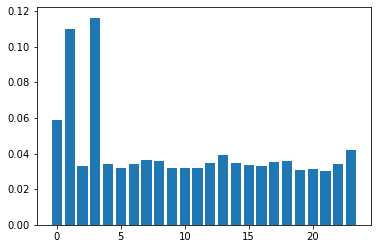

In [48]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [49]:
feature_list

['stage',
 'B365H',
 'B365D',
 'B365A',
 'home_buildUpPlaySpeed',
 'home_buildUpPlayPassing',
 'home_chanceCreationPassing',
 'home_chanceCreationCrossing',
 'home_chanceCreationShooting',
 'home_defencePressure',
 'home_defenceAggression',
 'home_defenceTeamWidth',
 'homeavg_winning_percentage',
 'homehome_winning_percentage',
 'away_buildUpPlaySpeed',
 'away_buildUpPlayPassing',
 'away_chanceCreationPassing',
 'away_chanceCreationCrossing',
 'away_chanceCreationShooting',
 'away_defencePressure',
 'away_defenceAggression',
 'away_defenceTeamWidth',
 'awayavg_winning_percentage',
 'awayaway_winning_percentage']

In [50]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.880982736915768
0.12701909375095366


In [51]:
importance

array([0.05897607, 0.10959642, 0.03298286, 0.11620817, 0.03384135,
       0.03199054, 0.0341911 , 0.03630762, 0.03571225, 0.03183569,
       0.03193279, 0.03206351, 0.0344815 , 0.03935062, 0.03475466,
       0.03345958, 0.03278768, 0.03519739, 0.03596365, 0.03096422,
       0.03159324, 0.03016173, 0.03391967, 0.04172769])

## Random forest classifier with no draw outcomes

In [67]:
# decision tree or random forest
import pandas as pd

data = final_merge_no_draws.copy(deep=True)

# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
y = np.array(data['outcome'])
# Remove the labels from the features
# axis 1 refers to the columns
X= data.drop(columns=['outcome', 'season', 'home_team_api_id', 'away_team_api_id', 'B365H', 'B365A', 'B365D'])
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
X = np.array(X)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [69]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9998717455431576
0.6802616390919585


In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 481  515]
 [ 316 1287]]
              precision    recall  f1-score   support

         0.0       0.60      0.48      0.54       996
         1.0       0.71      0.80      0.76      1603

    accuracy                           0.68      2599
   macro avg       0.66      0.64      0.65      2599
weighted avg       0.67      0.68      0.67      2599

0.6802616390919585


Feature: 0, Score: 0.06321
Feature: 1, Score: 0.03635
Feature: 2, Score: 0.03647
Feature: 3, Score: 0.03692
Feature: 4, Score: 0.03724
Feature: 5, Score: 0.03776
Feature: 6, Score: 0.03868
Feature: 7, Score: 0.03459
Feature: 8, Score: 0.03570
Feature: 9, Score: 0.08523
Feature: 10, Score: 0.08701
Feature: 11, Score: 0.03813
Feature: 12, Score: 0.03762
Feature: 13, Score: 0.03735
Feature: 14, Score: 0.03931
Feature: 15, Score: 0.04114
Feature: 16, Score: 0.03753
Feature: 17, Score: 0.03502
Feature: 18, Score: 0.03533
Feature: 19, Score: 0.08403
Feature: 20, Score: 0.08537


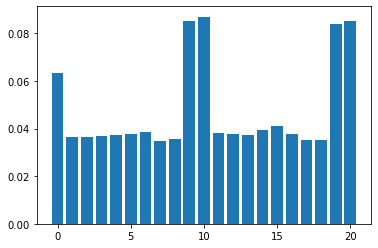

In [71]:
# random forest for feature importance on a classification problem
from matplotlib import pyplot

importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [72]:
feature_list

['stage',
 'home_buildUpPlaySpeed',
 'home_buildUpPlayPassing',
 'home_chanceCreationPassing',
 'home_chanceCreationCrossing',
 'home_chanceCreationShooting',
 'home_defencePressure',
 'home_defenceAggression',
 'home_defenceTeamWidth',
 'homeavg_winning_percentage',
 'homehome_winning_percentage',
 'away_buildUpPlaySpeed',
 'away_buildUpPlayPassing',
 'away_chanceCreationPassing',
 'away_chanceCreationCrossing',
 'away_chanceCreationShooting',
 'away_defencePressure',
 'away_defenceAggression',
 'away_defenceTeamWidth',
 'awayavg_winning_percentage',
 'awayaway_winning_percentage']

## Using xgboost feature importance classifier

In [60]:
!pip install xgboost

In [61]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.6.0


Feature: 0, Score: 0.02914
Feature: 1, Score: 0.15961
Feature: 2, Score: 0.04263
Feature: 3, Score: 0.07081
Feature: 4, Score: 0.03024
Feature: 5, Score: 0.02765
Feature: 6, Score: 0.03435
Feature: 7, Score: 0.02988
Feature: 8, Score: 0.03134
Feature: 9, Score: 0.03250
Feature: 10, Score: 0.03039
Feature: 11, Score: 0.03716
Feature: 12, Score: 0.03502
Feature: 13, Score: 0.06221
Feature: 14, Score: 0.03341
Feature: 15, Score: 0.03412
Feature: 16, Score: 0.03130
Feature: 17, Score: 0.03103
Feature: 18, Score: 0.03154
Feature: 19, Score: 0.03023
Feature: 20, Score: 0.03402
Feature: 21, Score: 0.03479
Feature: 22, Score: 0.03881
Feature: 23, Score: 0.04785


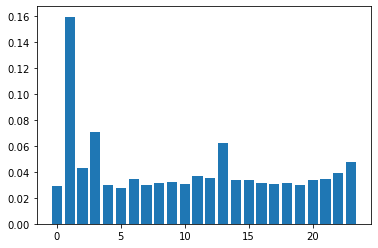

In [62]:
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [63]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9660125689367706
0.6791073489803771


## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 71.07


## Using Permutation Feature Importance Classifier

Feature: 0, Score: 0.00062
Feature: 1, Score: 0.00240
Feature: 2, Score: 0.00140
Feature: 3, Score: 0.00654
Feature: 4, Score: 0.00137
Feature: 5, Score: 0.00031
Feature: 6, Score: 0.00144
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00010
Feature: 9, Score: 0.00029
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00568
Feature: 13, Score: 0.00729
Feature: 14, Score: -0.00060
Feature: 15, Score: -0.00140
Feature: 16, Score: 0.00033
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00063
Feature: 19, Score: -0.00015
Feature: 20, Score: -0.00012
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.03107
Feature: 23, Score: 0.03898


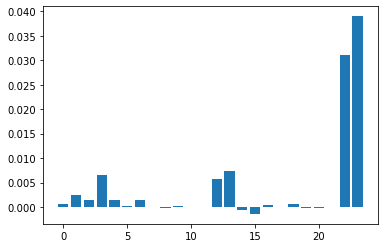

In [65]:
# permutation feature importance with knn for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

model = KNeighborsClassifier()
# fit the model
model.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [66]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7763242272668975
0.6567910734898038
